# exploratory data analysis

In [10]:
import pandas as pd
pd.__version__
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file = "../nowdata/charters_2015.pkl"
rawdta = pd.read_pickle(file)

In [5]:
def is_empty_list(series):
    """
    Args: Pandas Series of list
    Returns: a list contain Boolean value indicating whether the list is empty or not
    """
    lst = []
    for element in series:
        if len(element) == 0:
            lst.append(False)
        else:
            lst.append(True)
    return lst

In [6]:
#data cleaning
rawdta.dropna(axis = 0, how = 'any')
rawdta['constant'] = 1
rawdta = rawdta.loc[is_empty_list(rawdta['WEBTEXT']), :] #delete those with empty webtext

In [7]:
list(rawdta.columns)

['NCESSCH',
 'CMO_NAME',
 'CMO_MEMSUM',
 'SCH_NAME',
 'CMO_STATE',
 'CMO_SCHNUM',
 'CMO_URL',
 'CMO_NUMSTATES',
 'CMO_ALLSTATES',
 'CMO_SECTOR',
 'CMO_NUMSTUDENTS_CREDO17',
 'CMO_TYPE',
 'CMO_WEBTEXT',
 'SURVYEAR',
 'FIPST',
 'STABR',
 'SEANAME',
 'LEAID',
 'ST_LEAID',
 'SCHID',
 'ST_SCHID',
 'MSTREET1',
 'MSTREET2',
 'MSTREET3',
 'MCITY',
 'MSTATE',
 'MZIP',
 'MZIP4',
 'PHONE',
 'LSTREET1',
 'LSTREET2',
 'LSTREET3',
 'LCITY',
 'LSTATE',
 'LZIP',
 'LZIP4',
 'UNION',
 'OUT_OF_STATE_FLAG',
 'SCH_TYPE_TEXT',
 'SCH_TYPE',
 'RECON_STATUS',
 'GSLO',
 'GSHI',
 'LEVEL',
 'VIRTUAL',
 'BIES',
 'SY_STATUS_TEXT',
 'SY_STATUS',
 'UPDATED_STATUS_TEXT',
 'UPDATED_STATUS',
 'EFFECTIVE_DATE',
 'CHARTER_TEXT',
 'G13OFFERED',
 'AEOFFERED',
 'UGOFFERED',
 'NOGRADES',
 'CHARTAUTH1',
 'CHARTAUTHN1',
 'CHARTAUTH2',
 'CHARTAUTHN2',
 'IGOFFERED',
 'WEBSITE',
 'FRELCH',
 'REDLCH',
 'AE',
 'TOTAL',
 'AM',
 'AMALM',
 'AMALF',
 'AS',
 'ASALM',
 'ASALF',
 'HI',
 'HIALM',
 'HIALF',
 'BL',
 'BLALM',
 'BLALF',
 'WH',


In [8]:
len(rawdta['ESS_STR'])

8714

# Regress on ESS_STR

In [11]:
# Regress '% Total Population: White Alone'
#         "% Population 25 Years and Over: Bachelor's Degree",
#         '% Civilian Population in Labor Force 16 Years and Over: Unemployed'
#         '% Families: Income in Below Poverty Level'
#         '% Total Population: Foreign Born'
#         'Population Density (Per Sq. Mile)'
#         'constant'
# On      'ESS_STR'  measurement of the magnitude of traditionism
OLS1_dta = rawdta[['ESS_STR','% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
OLS1_dta = OLS1_dta.dropna(how = "any")
Y = OLS1_dta['ESS_STR']
X = OLS1_dta[['% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ESS_STR   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     75.60
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           1.47e-88
Time:                        21:20:52   Log-Likelihood:                -5534.8
No. Observations:                3217   AIC:                         1.108e+04
Df Residuals:                    3210   BIC:                         1.113e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0017      0.002     -0.925      0.355      -0.005       0.002
% Population 25 Years and Over: Bachelor's Degree                      0.0011      0.006      0.192      0.848      -0.010       0.012
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0240      0.012      1.991      0.047       0.000       0.048
% Families: Income in Below Poverty Level                             -0.0091      0.006     -1.399      0.162      -0.022       0.004
% Total Population: Foreign Born                                      -0.0333      0.002    -18.501      0.000      -0.037      -0.030
Population Density (Per Sq. Mile)                                      0.0001   1.04e-05     11.040      0.000    9.44e-05       0.000
constant                                                              -3.2617      0.264    -12.359      0.000      -3.779      -2.744
==============================================================================
Omnibus:                      337.838   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              353.271
Skew:                          -0.760   Prob(JB):                     1.94e-77
Kurtosis:                       2.427   Cond. No.                     4.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

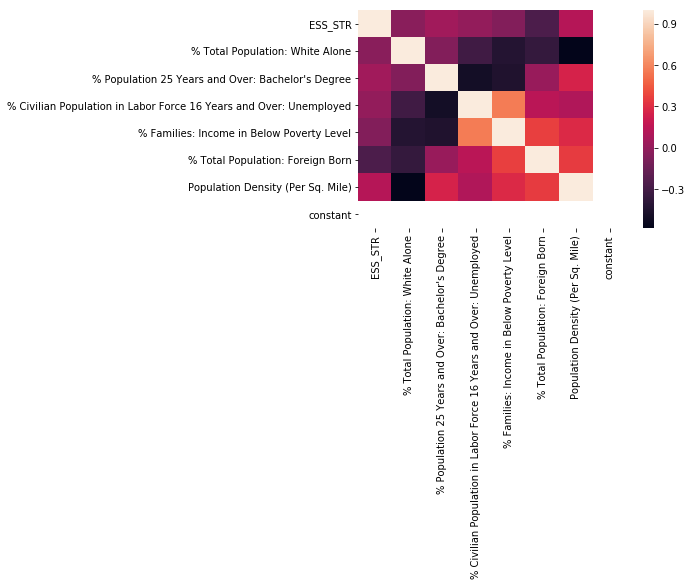

In [12]:
#check for multi-colinearity
corr = OLS1_dta.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

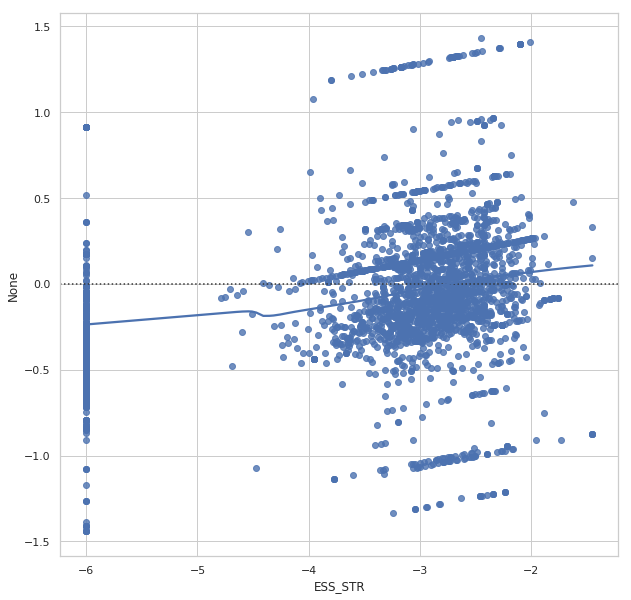

In [13]:
#check for heteroskedasticity
sns.set(style="whitegrid")
plt.figure(figsize = (10,10))
sns.residplot(Y, results.resid, lowess=True, color="b")

# Regress on PROG_STR

In [14]:
OLS2_dta = rawdta[['PROG_STR','% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
OLS2_dta = OLS2_dta.dropna(how = "any")
Y2 = OLS2_dta['PROG_STR']
X2 = OLS2_dta[['% Total Population: White Alone',"% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'constant']]
results2 = sm.OLS(Y2, X2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PROG_STR   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     99.60
Date:                Wed, 03 Oct 2018   Prob (F-statistic):          3.20e-115
Time:                        21:21:15   Log-Likelihood:                -5462.1
No. Observations:                3217   AIC:                         1.094e+04
Df Residuals:                    3210   BIC:                         1.098e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0024      0.002     -1.340      0.180      -0.006       0.001
% Population 25 Years and Over: Bachelor's Degree                     -0.0010      0.005     -0.176      0.860      -0.012       0.010
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0033      0.012      0.281      0.779      -0.020       0.026
% Families: Income in Below Poverty Level                             -0.0188      0.006     -2.970      0.003      -0.031      -0.006
% Total Population: Foreign Born                                      -0.0379      0.002    -21.513      0.000      -0.041      -0.034
Population Density (Per Sq. Mile)                                      0.0001   1.02e-05     10.461      0.000    8.64e-05       0.000
constant                                                              -2.6574      0.258    -10.299      0.000      -3.163      -2.151
==============================================================================
Omnibus:                      324.385   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.397
Skew:                          -0.886   Prob(JB):                     2.56e-93
Kurtosis:                       2.801   Cond. No.                     4.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

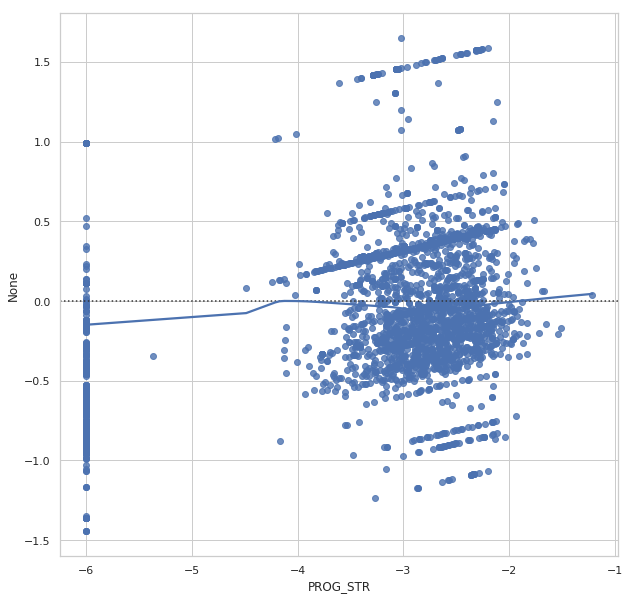

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize = (10,10))
sns.residplot(Y2, results2.resid, lowess=True, color="b")

# More Variables

In [16]:
OLS3_dta = rawdta[['PROG_STR','% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
OLS3_dta = OLS3_dta.dropna(how = "any")
Y3 = OLS3_dta['PROG_STR']
X3 = OLS3_dta[['% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
results3 = sm.OLS(Y3.astype(float), X3.astype(float)).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PROG_STR   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     45.89
Date:                Wed, 03 Oct 2018   Prob (F-statistic):          3.77e-115
Time:                        21:21:20   Log-Likelihood:                -4947.1
No. Observations:                2938   AIC:                             9924.
Df Residuals:                    2923   BIC:                         1.001e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                       -0.0030      0.002     -1.375      0.169      -0.007       0.001
% Population 25 Years and Over: Bachelor's Degree                     -0.0095      0.006     -1.554      0.120      -0.021       0.002
% Civilian Population in Labor Force 16 Years and Over: Unemployed    -0.0006      0.013     -0.051      0.959      -0.025       0.024
% Families: Income in Below Poverty Level                              0.0142      0.009      1.667      0.096      -0.003       0.031
% Total Population: Foreign Born                                      -0.0347      0.002    -15.593      0.000      -0.039      -0.030
Population Density (Per Sq. Mile)                                      0.0001   1.16e-05      8.919      0.000    8.06e-05       0.000
STR                                                                    0.0002      0.000      1.335      0.182   -8.41e-05       0.000
PCTETH                                                                -0.5103      0.131     -3.888      0.000      -0.768      -0.253
PCTFRL                                                                -0.1824      0.087     -2.088      0.037      -0.354      -0.011
MEMBER                                                              5.073e-05   4.79e-05      1.058      0.290   -4.33e-05       0.000
AGE                                                                    0.0056      0.005      1.161      0.246      -0.004       0.015
SD_lv_PVI_2017                                                        -0.0010      0.003     -0.322      0.747      -0.007       0.005
close_rate16                                                           0.4845      0.969      0.500      0.617      -1.415       2.384
Median Household Income (In 2016 Inflation Adjusted Dollars)        1.235e-05   2.85e-06      4.339      0.000    6.77e-06    1.79e-05
constant                                                              -3.2460      0.353     -9.187      0.000      -3.939      -2.553
==============================================================================
Omnibus:                      283.076   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.065
Skew:                          -0.867   Prob(JB):                     4.38e-81
Kurtosis:                       2.865   Cond. No.                     2.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there 

In [17]:
OLS4_dta = rawdta[['ESS_STR','% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
OLS4_dta = OLS4_dta.dropna(how = "any")
Y4 = OLS4_dta['ESS_STR']
X4 = OLS4_dta[['% Total Population: White Alone',
            "% Population 25 Years and Over: Bachelor's Degree",\
            '% Civilian Population in Labor Force 16 Years and Over: Unemployed',\
            '% Families: Income in Below Poverty Level','% Total Population: Foreign Born',\
            'Population Density (Per Sq. Mile)', 'STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE',\
            'SD_lv_PVI_2017', 'close_rate16', \
            'Median Household Income (In 2016 Inflation Adjusted Dollars)','constant']]
results4 = sm.OLS(Y4.astype(float), X4.astype(float)).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ESS_STR   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     34.93
Date:                Wed, 03 Oct 2018   Prob (F-statistic):           7.82e-88
Time:                        21:21:23   Log-Likelihood:                -5019.3
No. Observations:                2938   AIC:                         1.007e+04
Df Residuals:                    2923   BIC:                         1.016e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
% Total Population: White Alone                                        0.0008      0.002      0.342      0.732      -0.004       0.005
% Population 25 Years and Over: Bachelor's Degree                     -0.0129      0.006     -2.063      0.039      -0.025      -0.001
% Civilian Population in Labor Force 16 Years and Over: Unemployed     0.0155      0.013      1.200      0.230      -0.010       0.041
% Families: Income in Below Poverty Level                              0.0151      0.009      1.730      0.084      -0.002       0.032
% Total Population: Foreign Born                                      -0.0346      0.002    -15.174      0.000      -0.039      -0.030
Population Density (Per Sq. Mile)                                      0.0001   1.19e-05      9.199      0.000    8.59e-05       0.000
STR                                                                    0.0003      0.000      2.102      0.036    1.95e-05       0.001
PCTETH                                                                -0.0914      0.135     -0.680      0.497      -0.355       0.172
PCTFRL                                                                -0.1904      0.090     -2.128      0.033      -0.366      -0.015
MEMBER                                                                 0.0002   4.91e-05      3.344      0.001     6.8e-05       0.000
AGE                                                                    0.0029      0.005      0.588      0.557      -0.007       0.013
SD_lv_PVI_2017                                                        -0.0038      0.003     -1.256      0.209      -0.010       0.002
close_rate16                                                           0.9313      0.993      0.938      0.348      -1.016       2.879
Median Household Income (In 2016 Inflation Adjusted Dollars)        1.203e-05   2.92e-06      4.123      0.000    6.31e-06    1.78e-05
constant                                                              -4.0071      0.362    -11.065      0.000      -4.717      -3.297
==============================================================================
Omnibus:                      275.947   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.789
Skew:                          -0.755   Prob(JB):                     1.46e-67
Kurtosis:                       2.513   Cond. No.                     2.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+06. This might indicate that there 

In [18]:
groups = OLS3_dta[['SD_lv_PVI_2017', 'close_rate16', '% Total Population: White Alone', "% Population 25 Years and Over: Bachelor's Degree", '% Civilian Population in Labor Force 16 Years and Over: Unemployed', '% Families: Income in Below Poverty Level', '% Total Population: Foreign Born', 'Population Density (Per Sq. Mile)', 'Median Household Income (In 2016 Inflation Adjusted Dollars)']]
X5 = OLS3_dta[['STR', 'PCTETH', 'PCTFRL', 'MEMBER', 'AGE']]
import statsmodels.formula.api as smf

md = smf.mixedlm( "PROG_STR ~ STR+ PCTETH+ PCTFRL+ MEMBER+ AGE", OLS3_dta,  groups=OLS3_dta['SD_lv_PVI_2017'])
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: PROG_STR  
No. Observations: 2938    Method:             REML      
No. Groups:       289     Scale:              1.5202    
Min. group size:  1       Likelihood:         -4901.7972
Max. group size:  281     Converged:          Yes       
Mean group size:  10.2                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -3.125    0.093 -33.740 0.000 -3.307 -2.944
STR          -0.000    0.000  -0.105 0.916 -0.000  0.000
PCTETH       -0.330    0.120  -2.750 0.006 -0.565 -0.095
PCTFRL       -0.205    0.089  -2.302 0.021 -0.379 -0.030
MEMBER        0.000    0.000   1.993 0.046  0.000  0.000
AGE           0.001    0.005   0.302 0.762 -0.008  0.011
Group Var     0.268    0.039                            
========================================================

"""